## Greetings KRRT!

Hope you are well. So, this is a rather messy notebook, but it contains alot of experiments I ran which will save you a lot of time (as you wouldn't have to run them hehe. You can just use them as reference for how long some of them take, i.e., around 1000 minutes for the larger experiments).

For your main concern, I think the small code right under test case 1 should be enough for testing. It takes on avg 55 seconds. If we can bring it to around 1 seconds or so with vectorization or  parallelization it should be a good start.

In [1]:
import sys
sys.path.append("/home/ace07/Documents/GitHub/QMPRS")
sys.path.append("/home/ace07/Documents/GitHub/QICKIT")

In [2]:
from qickit.circuit import Circuit, QiskitCircuit, CirqCircuit, PennylaneCircuit, TKETCircuit

from qmprs.mps import MPS
from qmprs.synthesis.mps_encoding import Sequential

/home/ace07/Documents/GitHub/QMPRS/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [3]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [4]:
np.random.seed(0)

def generate_random_state(num_qubits: int) -> NDArray[np.complex128]:
    data = np.random.rand(2**num_qubits) + 1j * np.random.rand(2**num_qubits)
    data /= np.linalg.norm(data)
    return data

def encode_state(state: NDArray[np.complex128],
                 num_layers: int,
                 bond_dimension: int) -> tuple[Circuit, float]:
    mps = MPS(statevector=state, bond_dimension=bond_dimension)

    circuit = sequential_encoder.prepare_mps(mps, num_layers=num_layers)
    statevector = circuit.get_statevector()

    fidelity = abs(np.dot(state.conj(), statevector))

    return circuit, fidelity

### Test case 1

11 Qubits, 8 bond dimension.

In [5]:
state = generate_random_state(5)

In [8]:
import cProfile

# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

def run_sth() -> None:
    num_layers = [1, 2, 4, 8, 16, 32, 64]

    depths = []
    fidelities = []

    for layer in tqdm(num_layers):
        circuit, fidelity = encode_state(state, layer, 8)
        fidelities.append(fidelity)
        depths.append(circuit.get_depth())

cProfile.run("run_sth()", sort="tottime")

100%|██████████| 7/7 [00:52<00:00,  7.48s/it]

         84348484 function calls (81965942 primitive calls) in 52.257 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       14    6.401    0.457    6.401    0.457 {built-in method pytket._tket.passes.apply}
1844343/114146    1.974    0.000    6.213    0.000 copy.py:128(deepcopy)
8925905/8818087    1.080    0.000    1.873    0.000 {built-in method builtins.isinstance}
   242653    1.041    0.000    1.410    0.000 typing.py:1930(_get_protocol_attrs)
    36762    0.717    0.000    1.389    0.000 tketcircuit.py:119(_controlled_qubit_gate)
   104057    0.675    0.000    0.675    0.000 {built-in method pytket._tket.circuit.add_gate}
   301765    0.586    0.000    0.672    0.000 {method '__reduce_ex__' of 'object' objects}
301765/254596    0.586    0.000    4.014    0.000 copy.py:259(_reconstruct)
  3454738    0.565    0.000    0.666    0.000 {built-in method builtins.getattr}
    79183    0.532    0.000    2.070    0.000 quantum

In [6]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(CirqCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 8)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:01<00:06,  1.02s/it]

11


 29%|██▊       | 2/7 [00:02<00:07,  1.52s/it]

11


 43%|████▎     | 3/7 [00:07<00:10,  2.75s/it]

11


 57%|█████▋    | 4/7 [00:18<00:18,  6.08s/it]

11


 71%|███████▏  | 5/7 [00:52<00:32, 16.08s/it]

11


 86%|████████▌ | 6/7 [02:50<00:51, 51.02s/it]

11


100%|██████████| 7/7 [10:28<00:00, 89.77s/it] 


In [7]:
print(fidelities)
print(depths)

[0.06231778413885143, 0.07373058186466963, 0.09619379001670657, 0.1142986372126228, 0.12805651643967378, 0.165496304322542, 0.18679600142620886]
[61, 73, 97, 145, 241, 433, 817]


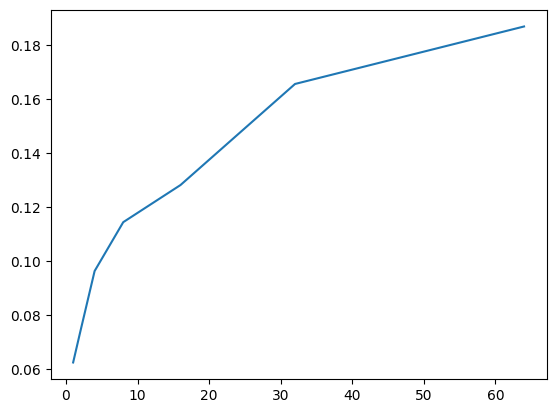

In [8]:
plt.plot(num_layers, fidelities)

In [9]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 8)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:04,  1.27it/s]

11


 29%|██▊       | 2/7 [00:02<00:05,  1.09s/it]

11


 43%|████▎     | 3/7 [00:05<00:08,  2.05s/it]

11


 57%|█████▋    | 4/7 [00:11<00:10,  3.59s/it]

11


 71%|███████▏  | 5/7 [00:25<00:15,  7.51s/it]

11


 86%|████████▌ | 6/7 [01:01<00:17, 17.30s/it]

11


100%|██████████| 7/7 [02:52<00:00, 24.63s/it]


In [10]:
print(fidelities)
print(depths)

[0.06231778413885151, 0.0737305818646696, 0.09619379001670632, 0.11429863721262253, 0.1280565164396733, 0.16549630432254112, 0.18679600142620725]
[61, 73, 97, 145, 241, 433, 817]


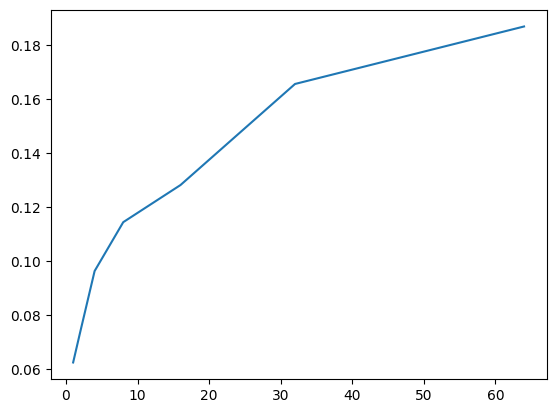

In [11]:
plt.plot(num_layers, fidelities)

In [12]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(PennylaneCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 8)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:05,  1.12it/s]

11


 29%|██▊       | 2/7 [00:02<00:06,  1.28s/it]

11


 43%|████▎     | 3/7 [00:06<00:09,  2.37s/it]

11


 57%|█████▋    | 4/7 [00:14<00:14,  4.77s/it]

11


 71%|███████▏  | 5/7 [00:37<00:22, 11.35s/it]

11


 86%|████████▌ | 6/7 [01:47<00:31, 31.13s/it]

11


100%|██████████| 7/7 [05:38<00:00, 48.36s/it]


In [13]:
print(fidelities)
print(depths)

[0.062317784138851494, 0.07373058186466967, 0.09619379001670668, 0.11429863721262319, 0.12805651643967456, 0.16549630432254406, 0.1867960014262141]
[61, 73, 97, 145, 241, 433, 817]


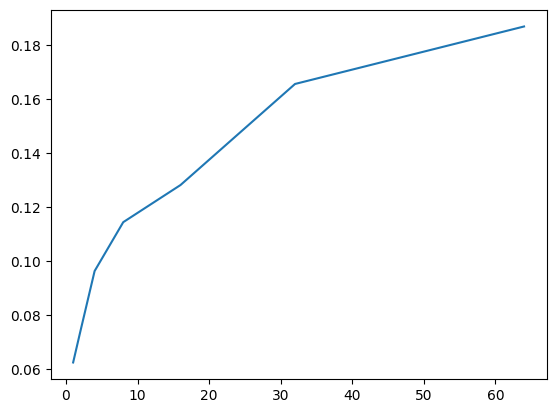

In [14]:
plt.plot(num_layers, fidelities)

In [15]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(QiskitCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 8)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

 14%|█▍        | 1/7 [00:01<00:09,  1.58s/it]

11
11


 29%|██▊       | 2/7 [00:06<00:16,  3.32s/it]

11


 43%|████▎     | 3/7 [00:20<00:33,  8.31s/it]

11


 57%|█████▋    | 4/7 [01:10<01:14, 24.67s/it]

11


 71%|███████▏  | 5/7 [04:14<02:44, 82.43s/it]

11


 86%|████████▌ | 6/7 [16:31<05:04, 304.85s/it]

11


100%|██████████| 7/7 [1:03:27<00:00, 543.91s/it] 


In [16]:
print(fidelities)
print(depths)

[0.062317784138851494, 0.0737305818646697, 0.09619379001670665, 0.11429863721262308, 0.12805651643967458, 0.16549630432254417, 0.18679600142621414]
[61, 73, 97, 145, 241, 433, 817]


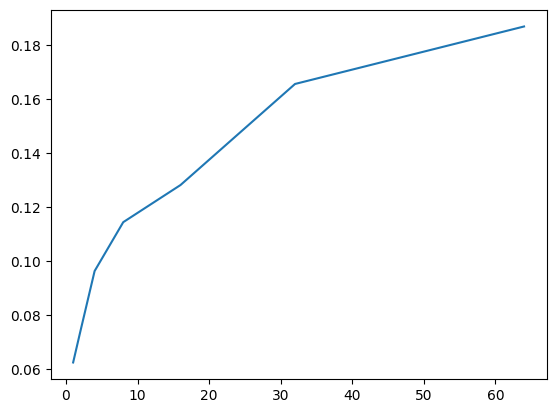

In [17]:
plt.plot(num_layers, fidelities)

### Test case 2

11 Qubits, 16 bond dimension.

In [18]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(CirqCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 16)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:01<00:06,  1.03s/it]

11


 29%|██▊       | 2/7 [00:02<00:07,  1.50s/it]

11


 43%|████▎     | 3/7 [00:06<00:10,  2.63s/it]

11


 57%|█████▋    | 4/7 [00:17<00:17,  5.90s/it]

11


 71%|███████▏  | 5/7 [00:50<00:31, 15.74s/it]

11


 86%|████████▌ | 6/7 [02:50<00:51, 51.01s/it]

11


100%|██████████| 7/7 [10:39<00:00, 91.36s/it] 


In [19]:
print(fidelities)
print(depths)

[0.8258465716987684, 0.8209940253340599, 0.8157521535161589, 0.8222187353905753, 0.8310960442337999, 0.8446260321619021, 0.8648484940604987]
[61, 73, 97, 145, 241, 433, 817]


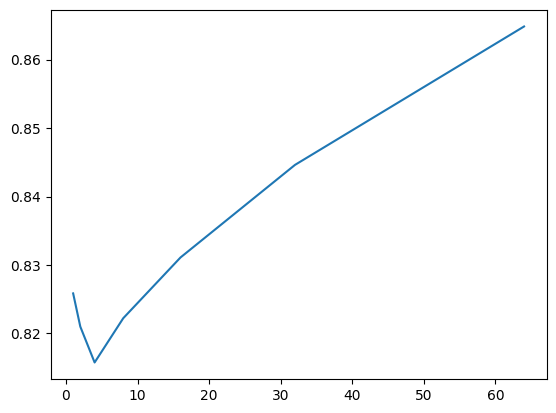

In [20]:
plt.plot(num_layers, fidelities)

In [21]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 16)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:04,  1.44it/s]

11


 29%|██▊       | 2/7 [00:01<00:05,  1.01s/it]

11


 43%|████▎     | 3/7 [00:04<00:06,  1.70s/it]

11


 57%|█████▋    | 4/7 [00:10<00:09,  3.30s/it]

11


 71%|███████▏  | 5/7 [00:22<00:13,  6.71s/it]

11


 86%|████████▌ | 6/7 [00:58<00:16, 16.58s/it]

11


100%|██████████| 7/7 [02:38<00:00, 22.69s/it]


In [22]:
print(fidelities)
print(depths)

[0.8258465716987679, 0.8209940253340592, 0.8157521535161585, 0.8222187353905738, 0.8310960442337967, 0.844626032161895, 0.8648484940604857]
[61, 73, 97, 145, 241, 433, 817]


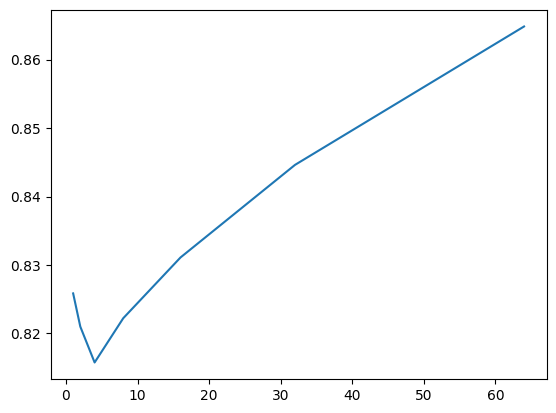

In [23]:
plt.plot(num_layers, fidelities)

In [24]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(PennylaneCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 16)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:04,  1.36it/s]

11


 29%|██▊       | 2/7 [00:02<00:05,  1.14s/it]

11


 43%|████▎     | 3/7 [00:05<00:08,  2.14s/it]

11


 57%|█████▋    | 4/7 [00:13<00:12,  4.29s/it]

11


 71%|███████▏  | 5/7 [00:33<00:20, 10.20s/it]

11


 86%|████████▌ | 6/7 [01:37<00:28, 28.38s/it]

11


100%|██████████| 7/7 [05:12<00:00, 44.59s/it]


In [25]:
print(fidelities)
print(depths)

[0.8258465716987683, 0.8209940253340607, 0.8157521535161603, 0.8222187353905785, 0.8310960442338055, 0.8446260321619155, 0.8648484940605238]
[61, 73, 97, 145, 241, 433, 817]


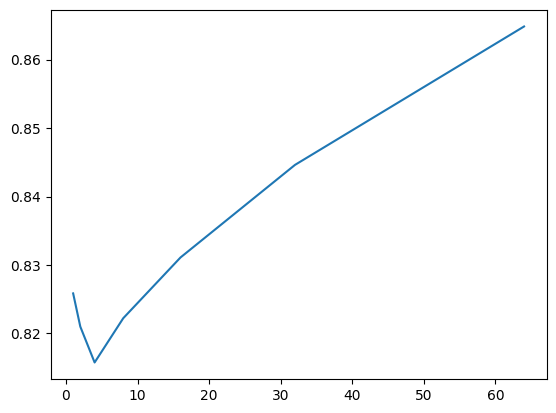

In [26]:
plt.plot(num_layers, fidelities)

In [27]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(QiskitCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 16)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

 14%|█▍        | 1/7 [00:01<00:10,  1.71s/it]

11
11


 29%|██▊       | 2/7 [00:05<00:15,  3.12s/it]

11


 43%|████▎     | 3/7 [00:19<00:30,  7.72s/it]

11


 57%|█████▋    | 4/7 [01:05<01:09, 23.10s/it]

11


 71%|███████▏  | 5/7 [03:59<02:34, 77.42s/it]

11


 86%|████████▌ | 6/7 [15:21<04:42, 282.96s/it]

11


100%|██████████| 7/7 [59:59<00:00, 514.22s/it] 


In [28]:
print(fidelities)
print(depths)

[0.8258465716987684, 0.8209940253340607, 0.8157521535161605, 0.8222187353905789, 0.8310960442338065, 0.8446260321619153, 0.8648484940605249]
[61, 73, 97, 145, 241, 433, 817]


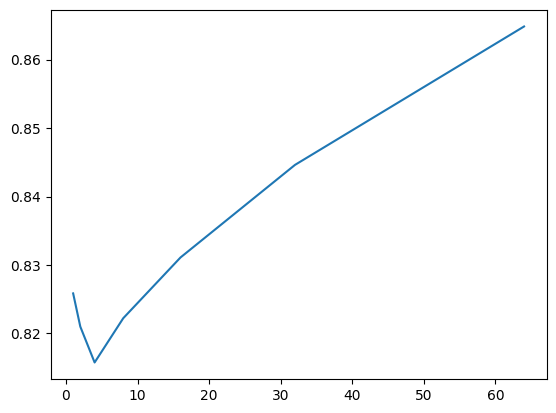

In [29]:
plt.plot(num_layers, fidelities)

### Test case 3

11 Qubits, 32 bond dimension.

In [ ]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(CirqCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:04,  1.24it/s]

11


 29%|██▊       | 2/7 [00:02<00:06,  1.38s/it]

11


 43%|████▎     | 3/7 [00:06<00:10,  2.51s/it]

11


 57%|█████▋    | 4/7 [00:17<00:17,  5.96s/it]

11


 71%|███████▏  | 5/7 [00:50<00:31, 15.53s/it]

11


 86%|████████▌ | 6/7 [02:45<00:49, 49.41s/it]

11


100%|██████████| 7/7 [10:40<00:00, 91.55s/it] 


In [ ]:
print(fidelities)
print(depths)

[0.8685253420355659, 0.8709143286971162, 0.8757686700759874, 0.8833760477682951, 0.8987734208244997, 0.9226506334946687, 0.9528911254993518]
[61, 73, 97, 145, 241, 433, 817]


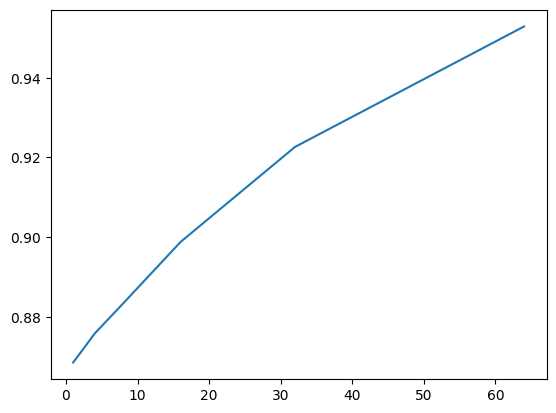

In [ ]:
plt.plot(num_layers, fidelities)

In [ ]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:04,  1.29it/s]

11


 29%|██▊       | 2/7 [00:02<00:05,  1.11s/it]

11


 43%|████▎     | 3/7 [00:04<00:07,  1.82s/it]

11


 57%|█████▋    | 4/7 [00:10<00:10,  3.54s/it]

11


 71%|███████▏  | 5/7 [00:24<00:14,  7.18s/it]

11


 86%|████████▌ | 6/7 [01:00<00:17, 17.10s/it]

11


100%|██████████| 7/7 [02:48<00:00, 24.13s/it]


In [ ]:
print(fidelities)
print(depths)

[0.8685253420355658, 0.8709143286971162, 0.8757686700759882, 0.8833760477682937, 0.8987734208244976, 0.922650633494664, 0.9528911254993435]
[61, 73, 97, 145, 241, 433, 817]


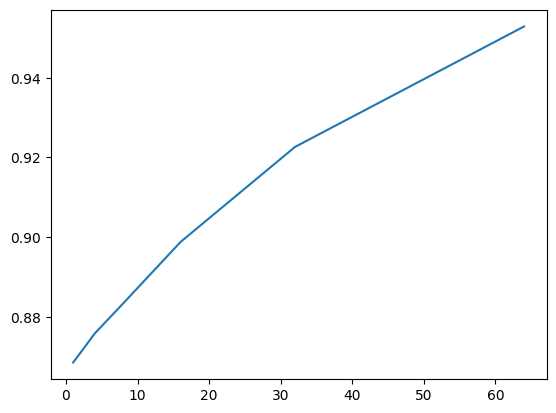

In [ ]:
plt.plot(num_layers, fidelities)

In [ ]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(PennylaneCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:04,  1.21it/s]

11


 29%|██▊       | 2/7 [00:02<00:06,  1.23s/it]

11


 43%|████▎     | 3/7 [00:05<00:08,  2.23s/it]

11


 57%|█████▋    | 4/7 [00:14<00:14,  4.71s/it]

11


 71%|███████▏  | 5/7 [00:36<00:22, 11.17s/it]

11


 86%|████████▌ | 6/7 [01:44<00:30, 30.40s/it]

11


100%|██████████| 7/7 [05:50<00:00, 50.05s/it] 


In [ ]:
print(fidelities)
print(depths)

[0.8685253420355661, 0.8709143286971174, 0.8757686700759892, 0.8833760477682978, 0.898773420824506, 0.9226506334946816, 0.95289112549938]
[61, 73, 97, 145, 241, 433, 817]


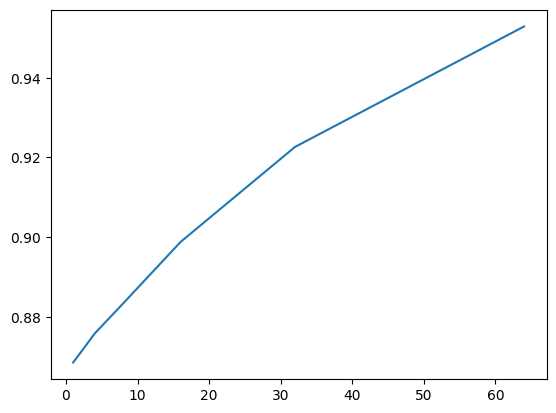

In [ ]:
plt.plot(num_layers, fidelities)

In [ ]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(QiskitCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

 14%|█▍        | 1/7 [00:01<00:09,  1.66s/it]

11
11


 29%|██▊       | 2/7 [00:06<00:17,  3.48s/it]

11


 43%|████▎     | 3/7 [00:21<00:34,  8.74s/it]

11


 57%|█████▋    | 4/7 [01:10<01:14, 24.75s/it]

11


 71%|███████▏  | 5/7 [04:22<02:50, 85.08s/it]

11


 86%|████████▌ | 6/7 [17:02<05:14, 314.38s/it]

11


100%|██████████| 7/7 [1:10:13<00:00, 601.88s/it] 


In [ ]:
print(fidelities)
print(depths)

[0.8685253420355661, 0.8709143286971173, 0.8757686700759897, 0.8833760477682979, 0.8987734208245066, 0.9226506334946821, 0.9528911254993817]
[61, 73, 97, 145, 241, 433, 817]


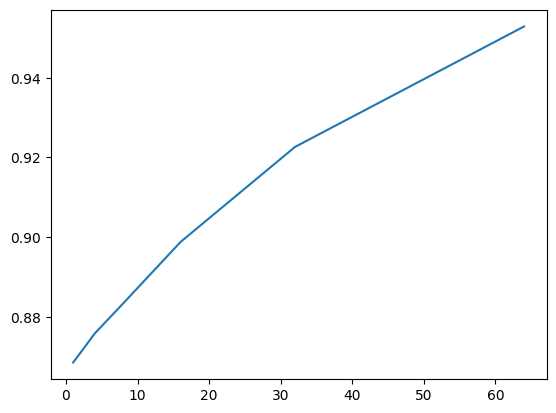

In [ ]:
plt.plot(num_layers, fidelities)

### Test case 4

11 Qubits, 64 bond dimension.

In [42]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(CirqCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 64)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:07<00:45,  7.55s/it]

11


 29%|██▊       | 2/7 [00:09<00:22,  4.45s/it]

11


 43%|████▎     | 3/7 [00:15<00:20,  5.13s/it]

11


 57%|█████▋    | 4/7 [00:36<00:33, 11.14s/it]

11


 71%|███████▏  | 5/7 [02:00<01:15, 37.68s/it]

11


 86%|████████▌ | 6/7 [05:54<01:44, 104.21s/it]

11


100%|██████████| 7/7 [19:05<00:00, 163.64s/it]


In [43]:
print(fidelities)
print(depths)

[0.8685253420355659, 0.8709143286971162, 0.8757686700759874, 0.883376047768295, 0.8987734208244997, 0.9226506334946687, 0.952891125499352]
[61, 73, 97, 145, 241, 433, 817]


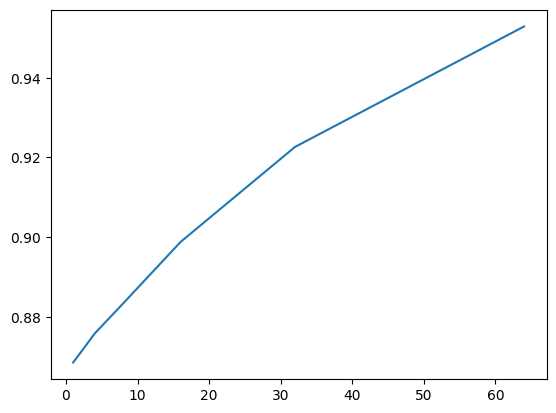

In [44]:
plt.plot(num_layers, fidelities)

In [45]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 64)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:05<00:35,  5.98s/it]

11


 29%|██▊       | 2/7 [00:11<00:27,  5.56s/it]

11


 43%|████▎     | 3/7 [00:14<00:18,  4.55s/it]

11


 57%|█████▋    | 4/7 [00:21<00:16,  5.55s/it]

11


 71%|███████▏  | 5/7 [00:42<00:21, 10.89s/it]

11


 86%|████████▌ | 6/7 [01:26<00:22, 22.36s/it]

11


100%|██████████| 7/7 [03:43<00:00, 31.99s/it]


In [46]:
print(fidelities)
print(depths)

[0.8685253420355658, 0.8709143286971162, 0.8757686700759882, 0.8833760477682937, 0.8987734208244976, 0.922650633494664, 0.9528911254993435]
[61, 73, 97, 145, 241, 433, 817]


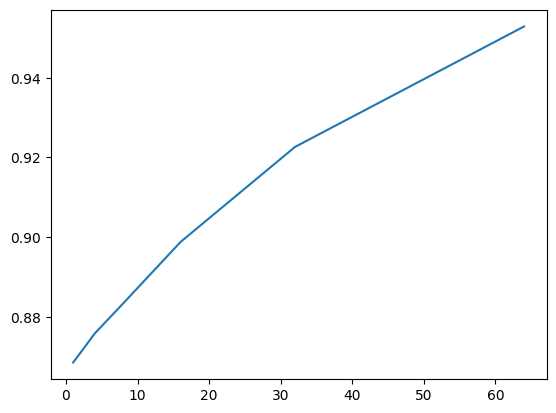

In [47]:
plt.plot(num_layers, fidelities)

In [48]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(PennylaneCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 64)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/7 [00:00<?, ?it/s]

11


 14%|█▍        | 1/7 [00:00<00:05,  1.14it/s]

11


 29%|██▊       | 2/7 [00:02<00:06,  1.33s/it]

11


 43%|████▎     | 3/7 [00:06<00:10,  2.50s/it]

11


 57%|█████▋    | 4/7 [00:15<00:14,  4.98s/it]

11


 71%|███████▏  | 5/7 [00:40<00:24, 12.23s/it]

11


 86%|████████▌ | 6/7 [02:05<00:37, 37.06s/it]

11


100%|██████████| 7/7 [06:52<00:00, 58.95s/it] 


In [49]:
print(fidelities)
print(depths)

[0.8685253420355661, 0.8709143286971174, 0.8757686700759892, 0.8833760477682978, 0.898773420824506, 0.9226506334946816, 0.95289112549938]
[61, 73, 97, 145, 241, 433, 817]


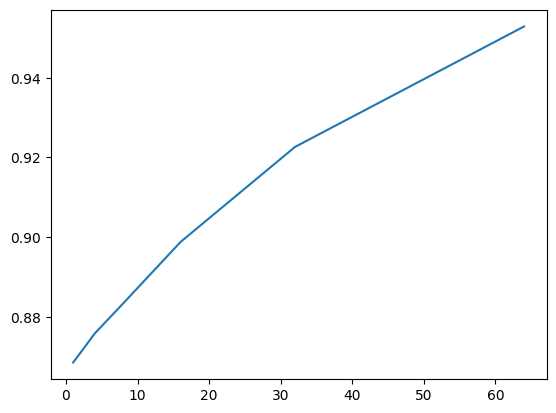

In [50]:
plt.plot(num_layers, fidelities)

In [51]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(QiskitCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 64)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

 14%|█▍        | 1/7 [00:02<00:12,  2.09s/it]

11
11


 29%|██▊       | 2/7 [00:10<00:29,  5.98s/it]

11


 43%|████▎     | 3/7 [00:29<00:47, 11.75s/it]

11


 57%|█████▋    | 4/7 [01:25<01:27, 29.23s/it]

11


 71%|███████▏  | 5/7 [04:57<03:10, 95.28s/it]

11


 86%|████████▌ | 6/7 [19:21<05:56, 356.44s/it]

11


100%|██████████| 7/7 [1:19:04<00:00, 677.72s/it] 


In [52]:
print(fidelities)
print(depths)

[0.8685253420355661, 0.8709143286971173, 0.8757686700759897, 0.8833760477682979, 0.8987734208245066, 0.9226506334946821, 0.9528911254993817]
[61, 73, 97, 145, 241, 433, 817]


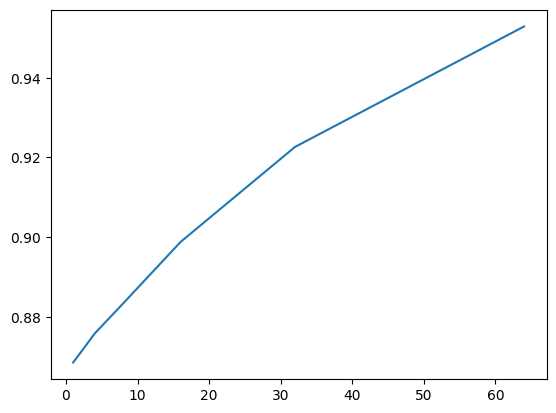

In [53]:
plt.plot(num_layers, fidelities)

In [6]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 32)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/13 [00:00<?, ?it/s]

11


  8%|▊         | 1/13 [00:01<00:12,  1.02s/it]

11


 15%|█▌        | 2/13 [00:02<00:13,  1.19s/it]

11


 23%|██▎       | 3/13 [00:04<00:18,  1.85s/it]

11


 31%|███       | 4/13 [00:11<00:34,  3.87s/it]

11


 38%|███▊      | 5/13 [00:25<00:59,  7.38s/it]

11


 46%|████▌     | 6/13 [00:59<01:55, 16.47s/it]

11


 54%|█████▍    | 7/13 [02:40<04:23, 43.92s/it]

11


 62%|██████▏   | 8/13 [08:18<11:27, 137.53s/it]

11


 69%|██████▉   | 9/13 [28:44<31:51, 477.92s/it]

11


 77%|███████▋  | 10/13 [1:48:53<1:30:45, 1815.02s/it]

11


 85%|████████▍ | 11/13 [7:14:25<4:01:14, 7237.35s/it]

11


 92%|█████████▏| 12/13 [12:25:47<2:58:38, 10718.96s/it]

11


100%|██████████| 13/13 [17:41:49<00:00, 4900.76s/it]   


In [7]:
print(fidelities)
print(depths)

[0.867379714995079, 0.8696367724509689, 0.8742185374935214, 0.8817025855733251, 0.896186130984999, 0.9204271077223907, 0.9524043391733461, 0.9830313920205525, 0.9977208877614018, 0.9999590357910961, 0.9999997620754087, 0.9999997620754087, 0.9999997620754087]
[61, 73, 97, 145, 241, 433, 817, 1585, 3119, 6191, 12101, 12101, 12101]


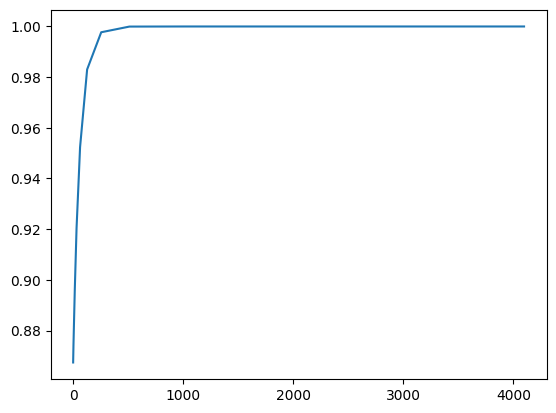

In [8]:
plt.plot(num_layers, fidelities)

In [9]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 8)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/13 [00:00<?, ?it/s]

11


  8%|▊         | 1/13 [00:12<02:35, 12.97s/it]

11


 15%|█▌        | 2/13 [00:14<01:07,  6.16s/it]

11


 23%|██▎       | 3/13 [00:17<00:46,  4.61s/it]

11


 31%|███       | 4/13 [00:23<00:47,  5.26s/it]

11


 38%|███▊      | 5/13 [00:44<01:27, 10.97s/it]

11


 46%|████▌     | 6/13 [01:21<02:19, 19.88s/it]

11


 54%|█████▍    | 7/13 [03:10<04:53, 48.86s/it]

11


 62%|██████▏   | 8/13 [09:02<12:07, 145.41s/it]

11


 69%|██████▉   | 9/13 [30:08<33:03, 495.82s/it]

11


 77%|███████▋  | 10/13 [1:53:49<1:34:38, 1892.90s/it]

11


 85%|████████▍ | 11/13 [7:30:35<4:09:54, 7497.44s/it]

11


 92%|█████████▏| 12/13 [13:43:30<3:20:23, 12023.35s/it]

11


100%|██████████| 13/13 [19:56:24<00:00, 5521.89s/it]   


In [10]:
print(fidelities)
print(depths)

[0.05898570028602801, 0.07367431110178688, 0.09638817952615737, 0.11488130680323262, 0.14209302998387524, 0.16645047106607064, 0.18363127432636725, 0.20757505181014665, 0.22405734015988987, 0.22168296449774402, 0.22193820505407486, 0.22193835338086199, 0.22193835338086199]
[61, 73, 97, 145, 241, 433, 817, 1585, 3121, 6191, 12335, 13057, 13057]


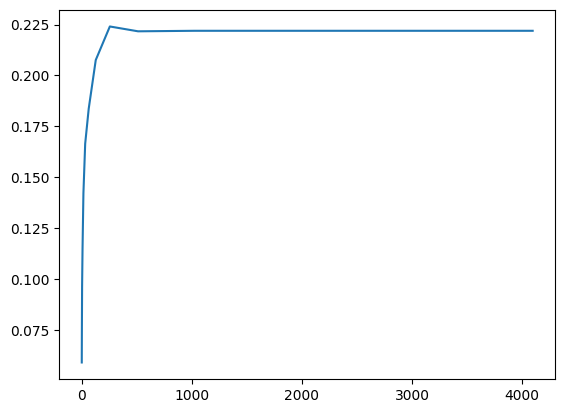

In [11]:
plt.plot(num_layers, fidelities)

In [12]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 16)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/13 [00:00<?, ?it/s]

11


  8%|▊         | 1/13 [00:01<00:22,  1.91s/it]

11


 15%|█▌        | 2/13 [00:03<00:16,  1.54s/it]

11


 23%|██▎       | 3/13 [00:05<00:20,  2.06s/it]

11


 31%|███       | 4/13 [00:13<00:37,  4.17s/it]

11


 38%|███▊      | 5/13 [00:27<01:01,  7.75s/it]

11


 46%|████▌     | 6/13 [01:03<02:01, 17.39s/it]

11


 54%|█████▍    | 7/13 [02:49<04:39, 46.52s/it]

11


 62%|██████▏   | 8/13 [08:35<11:48, 141.76s/it]

11


 69%|██████▉   | 9/13 [29:31<32:39, 489.94s/it]

11


 77%|███████▋  | 10/13 [1:50:16<1:31:43, 1834.54s/it]

11


 85%|████████▍ | 11/13 [6:52:03<3:47:09, 6814.69s/it]

11


 92%|█████████▏| 12/13 [12:12:34<2:56:32, 10592.02s/it]

11


100%|██████████| 13/13 [17:32:37<00:00, 4858.27s/it]   


In [13]:
print(fidelities)
print(depths)

[0.8340926927569536, 0.8293905232181277, 0.8208338403445027, 0.8223043886853596, 0.8330793355592594, 0.8488194905175328, 0.8672405583302922, 0.8845669106023495, 0.8946696081462322, 0.8957893869199125, 0.895850075250651, 0.895850075250651, 0.895850075250651]
[61, 73, 97, 145, 241, 433, 817, 1585, 3119, 6191, 11869, 11869, 11869]


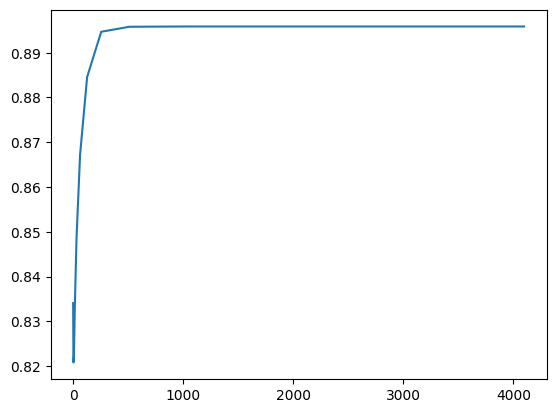

In [14]:
plt.plot(num_layers, fidelities)

In [15]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

depths = []
fidelities = []

for layer in tqdm(num_layers):
    circuit, fidelity = encode_state(state, layer, 8)
    fidelities.append(fidelity)
    depths.append(circuit.get_depth())

  0%|          | 0/13 [00:00<?, ?it/s]

11


  8%|▊         | 1/13 [00:01<00:21,  1.82s/it]

11


 15%|█▌        | 2/13 [00:03<00:17,  1.58s/it]

11


 23%|██▎       | 3/13 [00:06<00:21,  2.13s/it]

11


 31%|███       | 4/13 [00:12<00:34,  3.78s/it]

11


 38%|███▊      | 5/13 [00:27<01:03,  7.93s/it]

11


 46%|████▌     | 6/13 [01:02<01:59, 17.11s/it]

11


 54%|█████▍    | 7/13 [02:46<04:32, 45.43s/it]

11


 62%|██████▏   | 8/13 [08:34<11:49, 141.94s/it]

11


 69%|██████▉   | 9/13 [29:41<32:54, 493.56s/it]

11


 77%|███████▋  | 10/13 [1:51:11<1:32:32, 1850.91s/it]

11


 85%|████████▍ | 11/13 [7:19:43<4:03:54, 7317.08s/it]

11


 92%|█████████▏| 12/13 [13:46:59<3:22:39, 12159.88s/it]

11


100%|██████████| 13/13 [21:30:42<00:00, 5957.09s/it]   


In [16]:
print(fidelities)
print(depths)

[0.05898570028602801, 0.07367431110178688, 0.09638817952615737, 0.11488130680323262, 0.14209302998387524, 0.16645047106607064, 0.18363127432636725, 0.20757505181014665, 0.22405734015988987, 0.22168296449774402, 0.22193820505407486, 0.22193835338086199, 0.22193835338086199]
[61, 73, 97, 145, 241, 433, 817, 1585, 3121, 6191, 12335, 13057, 13057]


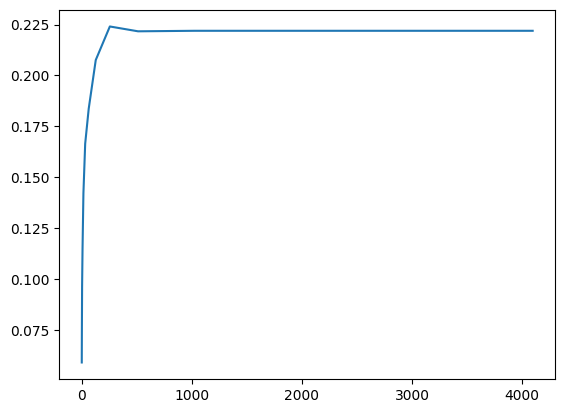

In [17]:
plt.plot(num_layers, fidelities)

### Bond dimension vs Fidelity

In [7]:
state_1 = generate_random_state(1)
state_2 = generate_random_state(2)
state_4 = generate_random_state(4)
state_8 = generate_random_state(8)
state_16 = generate_random_state(16)

In [7]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

bond_dims = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

fidelities = []

for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state, 128, bond_dim)
    fidelities.append(fidelity)

  0%|          | 0/12 [00:00<?, ?it/s]

11


  8%|▊         | 1/12 [00:05<00:56,  5.13s/it]

11


 17%|█▋        | 2/12 [06:15<36:40, 220.08s/it]

11


 25%|██▌       | 3/12 [12:24<43:13, 288.22s/it]

11


 33%|███▎      | 4/12 [18:31<42:32, 319.06s/it]

11


 42%|████▏     | 5/12 [24:45<39:33, 339.02s/it]

11


 50%|█████     | 6/12 [30:55<34:57, 349.63s/it]

11


 58%|█████▊    | 7/12 [36:57<29:27, 353.52s/it]

11


 67%|██████▋   | 8/12 [43:00<23:46, 356.64s/it]

11


 75%|███████▌  | 9/12 [49:03<17:55, 358.42s/it]

11


 83%|████████▎ | 10/12 [55:01<11:57, 358.52s/it]

11


 92%|█████████▏| 11/12 [1:01:00<05:58, 358.60s/it]

11


100%|██████████| 12/12 [1:06:58<00:00, 334.90s/it]


In [8]:
print(fidelities)

[0.06851878485361128, 0.11157662890826081, 0.20757505181015187, 0.8845669106024222, 0.9830313920206242, 0.9830313920206242, 0.9830313920206242, 0.9830313920206242, 0.9830313920206242, 0.9830313920206242, 0.9830313920206242, 0.9830313920206242]


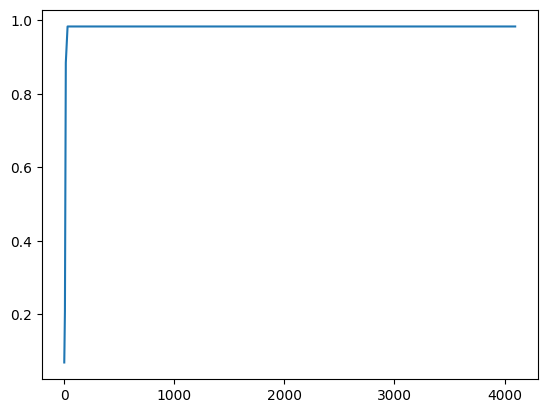

In [9]:
plt.plot(bond_dims, fidelities)

In [8]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

bond_dims = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

fidelities_1 = []
fidelities_2 = []
fidelities_4 = []
fidelities_8 = []
fidelities_16 = []

print("State 1")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_1, 128, bond_dim)
    fidelities_1.append(fidelity)

print("State 2")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_2, 128, bond_dim)
    fidelities_2.append(fidelity)

print("State 4")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_4, 128, bond_dim)
    fidelities_4.append(fidelity)

print("State 8")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_8, 128, bond_dim)
    fidelities_8.append(fidelity)

print("State 16")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_16, 128, bond_dim)
    fidelities_16.append(fidelity)

State 1


  8%|▊         | 1/12 [00:00<00:05,  2.16it/s]

1


 17%|█▋        | 2/12 [00:00<00:04,  2.46it/s]

1


 25%|██▌       | 3/12 [00:01<00:03,  2.52it/s]

1


 33%|███▎      | 4/12 [00:01<00:03,  2.55it/s]

1


 42%|████▏     | 5/12 [00:02<00:02,  2.47it/s]

1


 50%|█████     | 6/12 [00:02<00:02,  2.43it/s]

1


 58%|█████▊    | 7/12 [00:02<00:02,  2.49it/s]

1


 67%|██████▋   | 8/12 [00:03<00:01,  2.48it/s]

1


 75%|███████▌  | 9/12 [00:03<00:01,  2.54it/s]

1


 83%|████████▎ | 10/12 [00:04<00:00,  2.54it/s]

1


 92%|█████████▏| 11/12 [00:04<00:00,  2.58it/s]

1


100%|██████████| 12/12 [00:04<00:00,  2.51it/s]


1
State 2


  8%|▊         | 1/12 [00:00<00:09,  1.13it/s]

2


 17%|█▋        | 2/12 [00:01<00:08,  1.16it/s]

2


 25%|██▌       | 3/12 [00:02<00:07,  1.16it/s]

2


 33%|███▎      | 4/12 [00:03<00:06,  1.14it/s]

2


 42%|████▏     | 5/12 [00:04<00:06,  1.14it/s]

2


 50%|█████     | 6/12 [00:05<00:05,  1.14it/s]

2


 58%|█████▊    | 7/12 [00:06<00:04,  1.15it/s]

2


 67%|██████▋   | 8/12 [00:06<00:03,  1.16it/s]

2


 75%|███████▌  | 9/12 [00:07<00:02,  1.15it/s]

2


 83%|████████▎ | 10/12 [00:08<00:01,  1.10it/s]

2


 92%|█████████▏| 11/12 [00:09<00:00,  1.13it/s]

2


100%|██████████| 12/12 [00:10<00:00,  1.14it/s]


2
State 4


  8%|▊         | 1/12 [00:01<00:19,  1.80s/it]

4
4


 17%|█▋        | 2/12 [00:04<00:22,  2.29s/it]

4


 25%|██▌       | 3/12 [00:07<00:22,  2.46s/it]

4


 33%|███▎      | 4/12 [00:09<00:20,  2.54s/it]

4


 42%|████▏     | 5/12 [00:12<00:17,  2.56s/it]

4


 50%|█████     | 6/12 [00:14<00:15,  2.55s/it]

4


 58%|█████▊    | 7/12 [00:17<00:12,  2.55s/it]

4


 67%|██████▋   | 8/12 [00:20<00:10,  2.55s/it]

4


 75%|███████▌  | 9/12 [00:22<00:07,  2.60s/it]

4


 83%|████████▎ | 10/12 [00:25<00:05,  2.58s/it]

4


 92%|█████████▏| 11/12 [00:27<00:02,  2.58s/it]

4


100%|██████████| 12/12 [00:30<00:00,  2.54s/it]


State 8


  8%|▊         | 1/12 [00:03<00:41,  3.77s/it]

8
8


 17%|█▋        | 2/12 [03:15<19:01, 114.15s/it]

8


 25%|██▌       | 3/12 [06:34<22:55, 152.86s/it]

8


 33%|███▎      | 4/12 [09:57<23:02, 172.82s/it]

8


 42%|████▏     | 5/12 [13:22<21:30, 184.42s/it]

8


 50%|█████     | 6/12 [16:44<19:01, 190.29s/it]

8


 58%|█████▊    | 7/12 [20:14<16:23, 196.79s/it]

8


 67%|██████▋   | 8/12 [24:29<14:21, 215.34s/it]

8


 75%|███████▌  | 9/12 [28:18<10:58, 219.61s/it]

8


 83%|████████▎ | 10/12 [31:38<07:07, 213.70s/it]

8


 92%|█████████▏| 11/12 [34:57<03:29, 209.21s/it]

8


100%|██████████| 12/12 [38:19<00:00, 191.64s/it]


State 16


  0%|          | 0/12 [00:00<?, ?it/s]

16


  8%|▊         | 1/12 [00:08<01:34,  8.62s/it]

16


 17%|█▋        | 2/12 [27:54<2:43:56, 983.68s/it]

16


 25%|██▌       | 3/12 [1:08:09<4:05:31, 1636.87s/it]

16


 33%|███▎      | 4/12 [1:29:42<3:20:11, 1501.50s/it]

16


 42%|████▏     | 5/12 [1:51:30<2:47:01, 1431.61s/it]

16


 50%|█████     | 6/12 [2:13:39<2:19:40, 1396.67s/it]

16


 58%|█████▊    | 7/12 [2:36:06<1:55:02, 1380.43s/it]

16


 67%|██████▋   | 8/12 [2:58:34<1:31:20, 1370.05s/it]

16


 75%|███████▌  | 9/12 [3:20:34<1:07:43, 1354.41s/it]

16


 83%|████████▎ | 10/12 [3:42:33<44:47, 1343.59s/it] 

16


 92%|█████████▏| 11/12 [4:04:48<22:20, 1340.83s/it]

16


100%|██████████| 12/12 [4:27:01<00:00, 1335.11s/it]


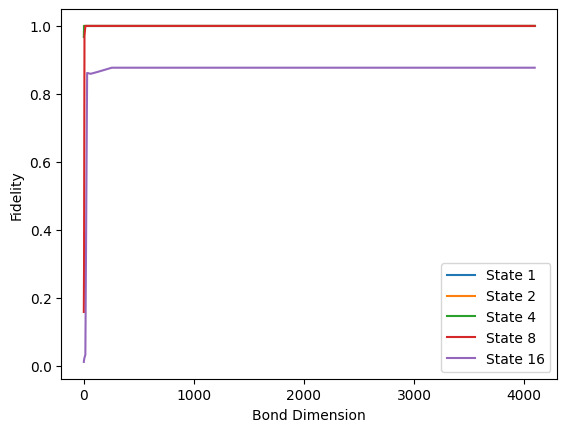

In [9]:
plt.plot(bond_dims, fidelities_1)
plt.plot(bond_dims, fidelities_2)
plt.plot(bond_dims, fidelities_4)
plt.plot(bond_dims, fidelities_8)
plt.plot(bond_dims, fidelities_16)
plt.xlabel("Bond Dimension")
plt.ylabel("Fidelity")
plt.legend(["State 1", "State 2", "State 4", "State 8", "State 16"])
plt.show()

In [10]:
print(fidelities_1)
print(fidelities_2)
print(fidelities_4)
print(fidelities_8)
print(fidelities_16)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998]
[0.9674669923133676, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956]
[0.15920010486897165, 0.28557999350238883, 0.9711028476561844, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232, 0.9999996356594232]
[0.012320328030157522, 0.017792882324796186, 0.024685002429408937, 0.03374404506018979, 0.8618519958256863, 0.859236431658755, 0.8649084719037996, 0.8771783609861852, 0.8771783609861852, 0.8771783609861852, 0.87717

In [11]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

bond_dims = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

fidelities_1 = []
fidelities_2 = []
fidelities_4 = []
fidelities_8 = []
fidelities_16 = []

print("State 1")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_1, 32, bond_dim)
    fidelities_1.append(fidelity)

print("State 2")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_2, 32, bond_dim)
    fidelities_2.append(fidelity)

print("State 4")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_4, 32, bond_dim)
    fidelities_4.append(fidelity)

print("State 8")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_8, 32, bond_dim)
    fidelities_8.append(fidelity)

print("State 16")
for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state_16, 32, bond_dim)
    fidelities_16.append(fidelity)

State 1


  8%|▊         | 1/12 [00:00<00:01,  7.23it/s]

1
1


 25%|██▌       | 3/12 [00:00<00:01,  7.98it/s]

1


 33%|███▎      | 4/12 [00:00<00:00,  8.32it/s]

1
1


 58%|█████▊    | 7/12 [00:00<00:00,  8.63it/s]

1
1


 83%|████████▎ | 10/12 [00:01<00:00,  8.72it/s]

1
1
1


100%|██████████| 12/12 [00:01<00:00,  8.51it/s]


1
1
State 2


  8%|▊         | 1/12 [00:00<00:03,  3.43it/s]

2
2


 25%|██▌       | 3/12 [00:00<00:02,  3.58it/s]

2


 33%|███▎      | 4/12 [00:01<00:02,  3.61it/s]

2


 42%|████▏     | 5/12 [00:01<00:01,  3.55it/s]

2


 50%|█████     | 6/12 [00:01<00:01,  3.60it/s]

2


 58%|█████▊    | 7/12 [00:01<00:01,  3.62it/s]

2
2


 75%|███████▌  | 9/12 [00:02<00:00,  3.58it/s]

2


 83%|████████▎ | 10/12 [00:02<00:00,  3.56it/s]

2


 92%|█████████▏| 11/12 [00:03<00:00,  3.52it/s]

2


100%|██████████| 12/12 [00:03<00:00,  3.57it/s]


2
State 4


  8%|▊         | 1/12 [00:00<00:06,  1.67it/s]

4
4


 17%|█▋        | 2/12 [00:02<00:11,  1.13s/it]

4


 25%|██▌       | 3/12 [00:03<00:11,  1.27s/it]

4


 33%|███▎      | 4/12 [00:04<00:10,  1.33s/it]

4


 42%|████▏     | 5/12 [00:06<00:09,  1.36s/it]

4


 50%|█████     | 6/12 [00:07<00:08,  1.38s/it]

4


 58%|█████▊    | 7/12 [00:09<00:06,  1.38s/it]

4


 67%|██████▋   | 8/12 [00:10<00:05,  1.39s/it]

4


 75%|███████▌  | 9/12 [00:12<00:04,  1.40s/it]

4


 83%|████████▎ | 10/12 [00:13<00:02,  1.40s/it]

4


 92%|█████████▏| 11/12 [00:15<00:01,  1.47s/it]

4


100%|██████████| 12/12 [00:16<00:00,  1.36s/it]


State 8


  8%|▊         | 1/12 [00:01<00:13,  1.22s/it]

8
8


 17%|█▋        | 2/12 [00:22<02:11, 13.17s/it]

8


 25%|██▌       | 3/12 [00:44<02:33, 17.09s/it]

8


 33%|███▎      | 4/12 [01:06<02:32, 19.09s/it]

8


 42%|████▏     | 5/12 [01:28<02:20, 20.12s/it]

8


 50%|█████     | 6/12 [01:50<02:04, 20.73s/it]

8


 58%|█████▊    | 7/12 [02:12<01:45, 21.14s/it]

8


 67%|██████▋   | 8/12 [02:34<01:25, 21.37s/it]

8


 75%|███████▌  | 9/12 [02:56<01:04, 21.64s/it]

8


 83%|████████▎ | 10/12 [03:18<00:43, 21.71s/it]

8


 92%|█████████▏| 11/12 [03:40<00:21, 21.91s/it]

8


100%|██████████| 12/12 [04:02<00:00, 20.25s/it]


State 16


  0%|          | 0/12 [00:00<?, ?it/s]

16


  8%|▊         | 1/12 [00:03<00:34,  3.18s/it]

16


 17%|█▋        | 2/12 [03:00<17:34, 105.43s/it]

16


 25%|██▌       | 3/12 [06:14<21:53, 145.93s/it]

16


 33%|███▎      | 4/12 [09:33<22:14, 166.77s/it]

16


 42%|████▏     | 5/12 [12:56<21:01, 180.16s/it]

16


 50%|█████     | 6/12 [16:18<18:44, 187.40s/it]

16


 58%|█████▊    | 7/12 [19:54<16:24, 196.91s/it]

16


 67%|██████▋   | 8/12 [23:18<13:15, 198.90s/it]

16


 75%|███████▌  | 9/12 [26:44<10:03, 201.19s/it]

16


 83%|████████▎ | 10/12 [30:04<06:42, 201.04s/it]

16


 92%|█████████▏| 11/12 [33:28<03:21, 201.71s/it]

16


100%|██████████| 12/12 [37:10<00:00, 185.88s/it]


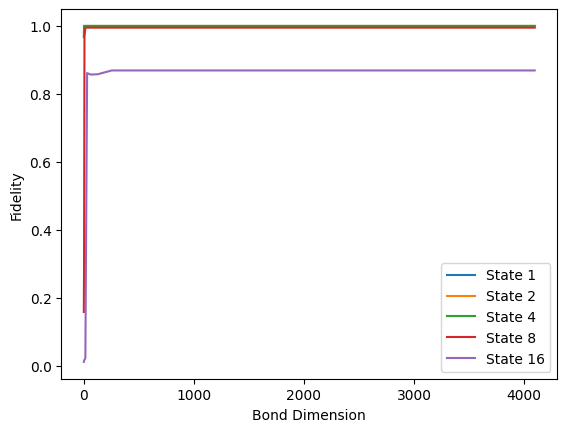

In [12]:
plt.plot(bond_dims, fidelities_1)
plt.plot(bond_dims, fidelities_2)
plt.plot(bond_dims, fidelities_4)
plt.plot(bond_dims, fidelities_8)
plt.plot(bond_dims, fidelities_16)
plt.xlabel("Bond Dimension")
plt.ylabel("Fidelity")
plt.legend(["State 1", "State 2", "State 4", "State 8", "State 16"])
plt.show()

In [13]:
print(fidelities_1)
print(fidelities_2)
print(fidelities_4)
print(fidelities_8)
print(fidelities_16)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 0.9999999999999998]
[0.9674669923133676, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956, 0.9999999988403956]
[0.15920010486897165, 0.28040877248519464, 0.9674187774547346, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304, 0.9949337705537304]
[0.012320328030157522, 0.015420391828935306, 0.01849664132962207, 0.02306370423705414, 0.8613582368641804, 0.8569736002471737, 0.8579689644158326, 0.8690862642531395, 0.8690862642531395, 0.8690862642531395, 0.86908

In [14]:
# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(PennylaneCircuit)

bond_dims = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

fidelities = []

for bond_dim in tqdm(bond_dims):
    _, fidelity = encode_state(state, 128, bond_dim)
    fidelities.append(fidelity)

  8%|▊         | 1/13 [00:04<00:57,  4.75s/it]

11


 15%|█▌        | 2/13 [00:10<00:56,  5.12s/it]

11
11


 23%|██▎       | 3/13 [13:19<1:00:32, 363.24s/it]

11


 31%|███       | 4/13 [26:37<1:20:13, 534.83s/it]

11


 38%|███▊      | 5/13 [39:59<1:24:09, 631.23s/it]

11


 46%|████▌     | 6/13 [53:10<1:19:58, 685.43s/it]

11


 54%|█████▍    | 7/13 [1:06:15<1:11:48, 718.15s/it]

11


 62%|██████▏   | 8/13 [1:19:28<1:01:49, 741.91s/it]

11


 69%|██████▉   | 9/13 [1:32:36<50:25, 756.44s/it]  

11


 77%|███████▋  | 10/13 [1:45:45<38:18, 766.24s/it]

11


 85%|████████▍ | 11/13 [1:58:47<25:42, 771.20s/it]

11


 92%|█████████▏| 12/13 [2:11:56<12:56, 776.49s/it]

11


100%|██████████| 13/13 [2:25:01<00:00, 669.31s/it]


In [15]:
print(fidelities)

[0.047040197988834395, 0.06851878485361128, 0.1115766289082654, 0.20757505181016073, 0.8845669106024135, 0.9830313920206178, 0.9830313920206178, 0.9830313920206178, 0.9830313920206178, 0.9830313920206178, 0.9830313920206178, 0.9830313920206178, 0.9830313920206178]


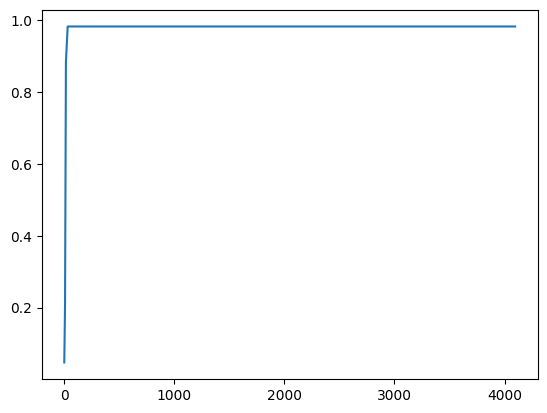

In [16]:
plt.plot(bond_dims, fidelities)

In [17]:
states = [generate_random_state(i) for i in range(1, 22)]

# Reduce the number of states to 10 uniformly
states = [state for i, state in enumerate(states) if i % 3 == 0]

state_dims = [int(np.log2(len(state))) for state in states]

In [18]:
state_dims

[1, 4, 7, 10, 13, 16, 19]

In [43]:
bond_dims = np.linspace(1, 100, 20, dtype=int)

In [44]:
bond_dims

array([  1,   6,  11,  16,  21,  27,  32,  37,  42,  47,  53,  58,  63,
        68,  73,  79,  84,  89,  94, 100])

In [33]:
fidelities = [[] for _ in range(20)]

In [11]:
sequential_encoder = Sequential(TKETCircuit)

In [13]:
for i, bond_dim in enumerate(tqdm(bond_dims)):
    for state in states:
        _, fidelity = encode_state(state, 4, int(bond_dim))
        fidelities[i].append(fidelity)

# Save the data
np.save("fidelities_4_layers.npy", fidelities)

 93%|█████████▎| 28/30 [21:33:41<2:16:22, 4091.37s/it] 

In [ ]:
for i, bond_dim in enumerate(tqdm(bond_dims)):
    for state in states:
        _, fidelity = encode_state(state, 8, bond_dim)
        fidelities[i].append(fidelity)

# Save the data
np.save("fidelities_8_layers.npy", fidelities)

In [ ]:
for i, bond_dim in enumerate(tqdm(bond_dims)):
    for state in states:
        _, fidelity = encode_state(state, 16, bond_dim)
        fidelities[i].append(fidelity)

# Save the data
np.save("fidelities_16_layers.npy", fidelities)

In [20]:
for i, bond_dim in enumerate(tqdm(bond_dims)):
    for state in states:
        _, fidelity = encode_state(state, 32, int(bond_dim))
        fidelities[i].append(fidelity)

# Save the data
np.save("fidelities_32_layers.npy", fidelities)

100%|██████████| 15/15 [3:07:01<00:00, 748.09s/it]  


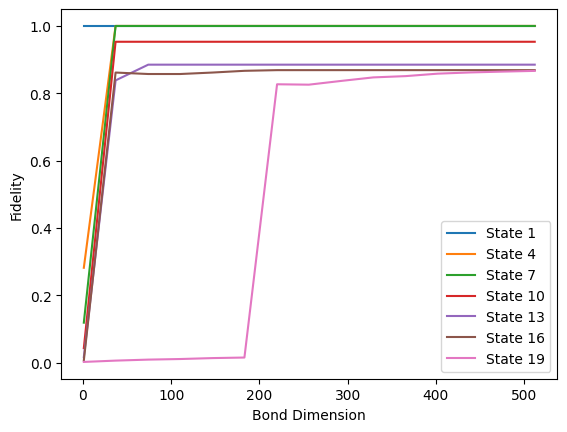

In [31]:
for fidelity in fidelities.T:
    plt.plot(bond_dims, fidelity)
plt.xlabel("Bond Dimension")
plt.ylabel("Fidelity")
plt.legend([f"State {state_dim}" for state_dim in state_dims])

plt.show()

In [34]:
for state in states:
    for i, bond_dim in enumerate(tqdm(bond_dims)):
        _, fidelity = encode_state(state, 32, int(bond_dim))
        fidelities[i].append(fidelity)

# Save the data
# np.save("fidelities_32_layers.npy", fidelities)

100%|██████████| 20/20 [2:37:10<00:00, 471.55s/it]  


In [39]:
fidelities = np.array(fidelities)

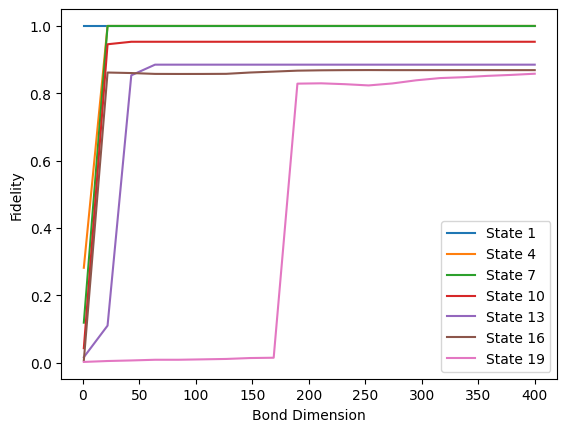

In [42]:
for fidelity in fidelities.T:
    plt.plot(bond_dims, fidelity)

plt.xlabel("Bond Dimension")
plt.ylabel("Fidelity")
plt.legend([f"State {state_dim}" for state_dim in state_dims])

plt.show()

In [46]:
fidelities_13 = []

for i, bond_dim in enumerate(tqdm(bond_dims)):
    _, fidelity = encode_state(states[4], 32, int(bond_dim))
    fidelities_13.append(fidelity)

100%|██████████| 20/20 [23:09<00:00, 69.46s/it]


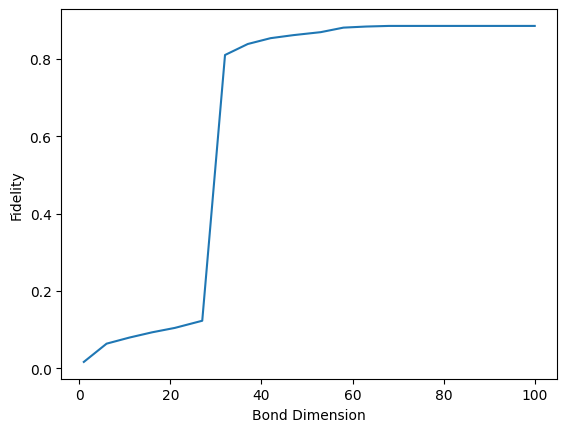

In [47]:
plt.plot(bond_dims, fidelities_13)

plt.xlabel("Bond Dimension")
plt.ylabel("Fidelity")

plt.show()

In [ ]:
for i, bond_dim in enumerate(tqdm(bond_dims)):
    for state in states:
        _, fidelity = encode_state(state, 64, bond_dim)
        fidelities[i].append(fidelity)

# Save the data
np.save("fidelities_64_layers.npy", fidelities)

In [ ]:
for i, bond_dim in enumerate(tqdm(bond_dims)):
    for state in states:
        _, fidelity = encode_state(state, 128, bond_dim)
        fidelities[i].append(fidelity)

# Save the data
np.save("fidelities_128_layers.npy", fidelities)

In [53]:
max_num_qubits = 19

states = [generate_random_state(i) for i in range(1, max_num_qubits + 1)]
states = [state for i, state in enumerate(states) if i % 2 == 0]

state_dims = [int(np.log2(len(state))) for state in states]
print(state_dims)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [54]:
layers = np.linspace(1, 128, 20, dtype=int)
print(layers)

[  1   7  14  21  27  34  41  47  54  61  67  74  81  87  94 101 107 114
 121 128]


In [55]:
depths = [[] for _ in range(max_num_qubits)]

In [57]:
for i, state in enumerate(tqdm(states)):
    for layer in layers:
        circuit, _ = encode_state(state, int(layer), 512)
        depths[i].append(circuit.get_depth())

100%|██████████| 10/10 [15:28:56<00:00, 5573.65s/it] 


In [66]:
new_depths = depths[:10]

In [68]:
print(new_depths)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13], [25, 97, 179, 263, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287], [37, 109, 193, 277, 349, 431, 515, 587, 671, 755, 827, 911, 995, 1067, 1151, 1199, 1199, 1199, 1199, 1199], [49, 121, 205, 289, 361, 445, 529, 601, 685, 769, 841, 925, 1009, 1081, 1163, 1247, 1319, 1403, 1487, 1571], [61, 133, 217, 301, 373, 457, 541, 613, 697, 781, 853, 937, 1021, 1093, 1177, 1261, 1333, 1417, 1501, 1585], [73, 145, 229, 313, 385, 469, 553, 625, 709, 793, 865, 949, 1033, 1105, 1189, 1273, 1345, 1429, 1513, 1597], [85, 157, 241, 325, 397, 481, 565, 637, 721, 805, 877, 961, 1045, 1117, 1201, 1285, 1357, 1441, 1525, 1609], [97, 169, 253, 337, 409, 493, 577, 649, 733, 817, 889, 973, 1057, 1129, 1213, 1297, 1369, 1453, 1537, 1621], [109, 181, 265, 349, 421, 505, 589, 661, 745, 829, 901, 985, 1069, 1141, 1225, 1309, 1381, 1465, 1549,

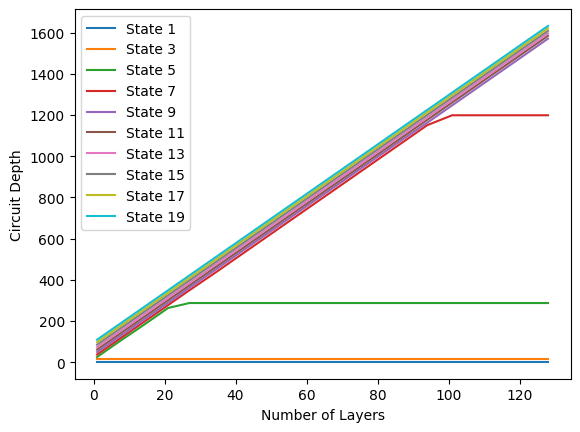

In [67]:
for depth in new_depths:
    plt.plot(layers, depth)

plt.xlabel("Number of Layers")
plt.ylabel("Circuit Depth")

plt.legend([f"State {state_dim}" for state_dim in state_dims])
plt.show()

In [10]:
profiler_state = generate_random_state(8)

In [19]:
import cProfile
from pstats import Stats

# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

def run() -> None:
    num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

    depths = []
    fidelities = []

    for layer in tqdm(num_layers):
        circuit, fidelity = encode_state(profiler_state, layer, 8)
        fidelities.append(fidelity)
        depths.append(circuit.get_depth())

    print(fidelities)
    print(depths)

cProfile.run("run()", "sequential_encoding.prof", sort="tottime")

stats = Stats("sequential_encoding.prof")
stats.strip_dirs()
stats.sort_stats("tottime")
stats.print_stats()

  0%|          | 0/13 [00:00<?, ?it/s]

8


  8%|▊         | 1/13 [00:15<03:05, 15.45s/it]

8


 15%|█▌        | 2/13 [00:26<02:19, 12.70s/it]

8


 23%|██▎       | 3/13 [00:35<01:51, 11.16s/it]

8


 31%|███       | 4/13 [00:47<01:43, 11.49s/it]

8


 38%|███▊      | 5/13 [01:09<02:00, 15.10s/it]

8


 46%|████▌     | 6/13 [02:22<04:03, 34.82s/it]

8


 54%|█████▍    | 7/13 [04:48<07:06, 71.12s/it]

8


 62%|██████▏   | 8/13 [11:44<15:05, 181.03s/it]

8


 69%|██████▉   | 9/13 [24:15<23:57, 359.26s/it]

8


 77%|███████▋  | 10/13 [37:10<24:23, 487.73s/it]

8


 85%|████████▍ | 11/13 [50:50<19:38, 589.37s/it]

8


 92%|█████████▏| 12/13 [1:05:37<11:19, 679.94s/it]

8


100%|██████████| 13/13 [1:23:05<00:00, 383.46s/it]


[0.892708299029504, 0.9035675455058495, 0.9170821697086007, 0.9347958210548947, 0.9597806294908835, 0.9773242746397812, 0.9796667261107846, 0.9798941350529169, 0.979899832491341, 0.979899832491341, 0.979899832491341, 0.979899832491341, 0.979899832491341]
[43, 55, 79, 127, 223, 415, 797, 1565, 2201, 2201, 2201, 2201, 2201]
Tue Aug 13 02:59:42 2024    sequential_encoding.prof

         8013484921 function calls (7919991857 primitive calls) in 4982.791 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 89633099  435.607    0.000  595.196    0.000 typing.py:1930(_get_protocol_attrs)
 15034942  323.327    0.000  686.251    0.000 tketcircuit.py:119(_controlled_qubit_gate)
 41332622  316.943    0.000  316.943    0.000 {built-in method pytket._tket.circuit.add_gate}
165384362  235.636    0.000  235.636    0.000 {built-in method pytket._tket.circuit.create}
 62613623  150.525    0.000 1702.783    0.000 circuit.py:149(process_gate_para

In [11]:
import cProfile
from pstats import Stats

# Sanity check : Ensure the plateau is not a depth limitation imposed by TKET
sequential_encoder = Sequential(TKETCircuit)

def run() -> None:
    num_layers = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

    depths = []
    fidelities = []

    for layer in tqdm(num_layers):
        circuit, fidelity = encode_state(profiler_state, layer, 8)
        fidelities.append(fidelity)
        depths.append(circuit.get_depth())

    print(fidelities)
    print(depths)

cProfile.run("run()", "sequential_encoding_updated.prof", sort="tottime")

stats = Stats("sequential_encoding_updated.prof")
stats.strip_dirs()
stats.sort_stats("tottime")
stats.print_stats()

  0%|          | 0/13 [00:00<?, ?it/s]

8


  8%|▊         | 1/13 [00:01<00:14,  1.19s/it]

8


 15%|█▌        | 2/13 [00:03<00:20,  1.85s/it]

8


 23%|██▎       | 3/13 [00:08<00:31,  3.15s/it]

8


 31%|███       | 4/13 [00:17<00:51,  5.76s/it]

8


 38%|███▊      | 5/13 [00:39<01:32, 11.54s/it]

8


 46%|████▌     | 6/13 [01:30<02:53, 24.76s/it]

8


 54%|█████▍    | 7/13 [03:41<05:57, 59.59s/it]

8


 62%|██████▏   | 8/13 [10:01<13:27, 161.49s/it]

8


 69%|██████▉   | 9/13 [21:22<21:36, 324.10s/it]

8


 77%|███████▋  | 10/13 [33:02<22:00, 440.16s/it]

8


 85%|████████▍ | 11/13 [45:15<17:39, 529.68s/it]

8


 92%|█████████▏| 12/13 [58:32<10:10, 610.88s/it]

8


100%|██████████| 13/13 [1:13:55<00:00, 341.19s/it]

[0.8927082990295051, 0.9035675455058508, 0.9170821697086043, 0.9347958210548977, 0.9597806294908886, 0.9773242746398311, 0.9796667261108036, 0.9798941350529562, 0.9798998324790325, 0.9798998324790325, 0.9798998324790325, 0.9798998324790325, 0.9798998324790325]
[43, 55, 79, 127, 223, 415, 797, 1565, 2201, 2201, 2201, 2201, 2201]
Thu Aug 15 04:52:50 2024    sequential_encoding_updated.prof

         7744000477 function calls (7652743615 primitive calls) in 4432.480 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 89633099  379.816    0.000  516.691    0.000 typing.py:1930(_get_protocol_attrs)
 15034942  285.409    0.000  561.778    0.000 tketcircuit.py:119(_controlled_qubit_gate)
       26  267.198   10.277  267.198   10.277 {built-in method pytket._tket.passes.apply}
 41332622  256.008    0.000  256.008    0.000 {built-in method pytket._tket.circuit.add_gate}
165384362  200.676    0.000  200.676    0.000 {built-in method pyt